## Capstone Project - 3

**Title**: Hotel Reviews sentiment analysis

**Dataset**: https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews/notebook#Conclusion

**Topic to be used**: Sentiment Analysis


In [1]:
import pandas as pd
import numpy as np
import spacy


In [2]:
df=pd.read_csv('./Hotel_Reviews.csv') 
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [4]:
df['Average_Score']

0         7.7
1         7.7
2         7.7
3         7.7
4         7.7
         ... 
515733    8.1
515734    8.1
515735    8.1
515736    8.1
515737    8.1
Name: Average_Score, Length: 515738, dtype: float64

In [5]:
df['Reviewer_Score'].value_counts()

Reviewer_Score
10.0    115853
9.6      71167
9.2      58583
8.8      46429
8.3      41128
7.5      34878
7.9      33097
7.1      24855
6.7      18793
6.3      14924
5.8      12034
5.4       9526
5.0       8422
4.6       6240
4.2       5095
3.8       4044
3.3       2772
2.5       2199
2.9       1589
9.5        724
9.0        647
8.5        508
8.0        505
7.0        411
6.5        345
6.0        253
5.5        227
4.5        122
4.0         84
3.5         79
9.4         63
8.1         39
3.0         37
6.9         29
5.6         17
4.4         12
3.1          8
Name: count, dtype: int64

In [6]:
df.groupby('Hotel_Name',sort=False)['Review_Total_Negative_Word_Counts'].sum()

Hotel_Name
Hotel Arena                         12474
K K Hotel George                    10417
Apex Temple Court Hotel             12435
The Park Grand London Paddington    38734
Monhotel Lounge SPA                   529
                                    ...  
Suite Hotel 900 m zur Oper           7895
Hotel Amadeus                        2007
The Berkeley                         1553
Holiday Inn London Kensington       75255
Atlantis Hotel Vienna                7264
Name: Review_Total_Negative_Word_Counts, Length: 1492, dtype: int64

In [8]:
def label_sentiment(score):
    if score > 7:
        return 2   # Positive
    elif score >= 4.5:
        return 1   # Neutral
    else:
        return 0   # Negative

df['sentiment'] = df['Reviewer_Score'].apply(label_sentiment)
df['sentiment'].value_counts()


sentiment
2    428476
1     71343
0     15919
Name: count, dtype: int64

In [9]:
df['review'] = df['Positive_Review'].str.strip() + ". " + df['Negative_Review']
df1 = df[['review', 'sentiment']]
df1

,review,sentiment
0,Only the park outside of the hotel was beautif...,0
1,No real complaints the hotel was great great l...,2
2,Location was good and staff were ok It is cute...,2
3,Great location in nice surroundings the bar an...,0
4,Amazing location and building Romantic setting...,1
...,...,...
515733,location. no trolly or staff to help you take...,1
515734,Breakfast was ok and we got earlier check in. ...,1
515735,No Positive. The ac was useless It was a hot ...,0
515736,The rooms are enormous and really comfortable ...,2


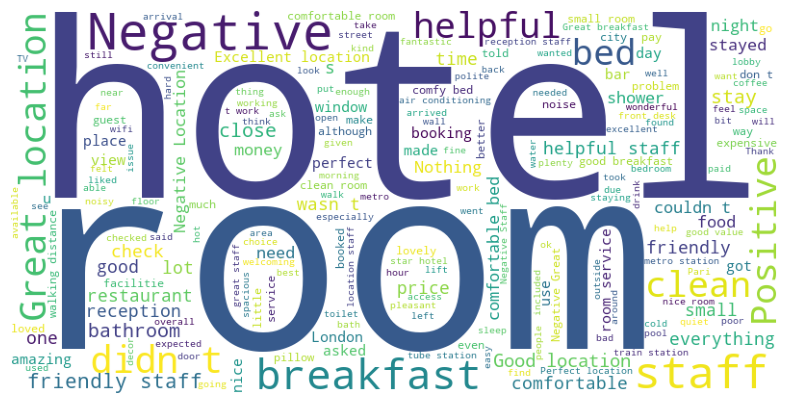

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df1['review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
# Doing sentiment analysis using vader to get additional features.

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# nltk.download('vader_lexicon')

sentiments = []
sia = SentimentIntensityAnalyzer()
for title in df1['review']:
    sentiment = sia.polarity_scores(title)
    sentiments.append(sentiment)

df1['Sentiment'] = sentiments

df1['Negative'] = [s['neg'] for s in df1['Sentiment']]
df1['Neutral'] = [s['neu'] for s in df1['Sentiment']]
df1['Positive'] = [s['pos'] for s in df1['Sentiment']]
df1['Compound'] = [s['compound'] for s in df1['Sentiment']]

df1.drop('Sentiment', axis=1, inplace=True)

df1[['review', 'Negative', 'Neutral', 'Positive', 'Compound']]    

C:\Users\aksha\AppData\Local\Temp\ipykernel_33100\1526553808.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = sentiments
C:\Users\aksha\AppData\Local\Temp\ipykernel_33100\1526553808.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Negative'] = [s['neg'] for s in df1['Sentiment']]
C:\Users\aksha\AppData\Local\Temp\ipykernel_33100\1526553808.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,review,Negative,Neutral,Positive,Compound
0,Only the park outside of the hotel was beautif...,0.084,0.865,0.051,-0.9245
1,No real complaints the hotel was great great l...,0.118,0.708,0.174,0.8340
2,Location was good and staff were ok It is cute...,0.122,0.740,0.138,-0.2263
3,Great location in nice surroundings the bar an...,0.103,0.783,0.114,0.1910
4,Amazing location and building Romantic setting...,0.058,0.861,0.081,0.5263
...,...,...,...,...,...
515733,location. no trolly or staff to help you take...,0.130,0.710,0.160,0.1280
515734,Breakfast was ok and we got earlier check in. ...,0.000,0.644,0.356,0.7351
515735,No Positive. The ac was useless It was a hot ...,0.203,0.650,0.146,-0.1027
515736,The rooms are enormous and really comfortable ...,0.207,0.667,0.126,-0.3197


In [7]:
df1.head()

,review,sentiment,Negative,Neutral,Positive,Compound
0,Only the park outside of the hotel was beautif...,0,0.084,0.865,0.051,-0.9245
1,No real complaints the hotel was great great l...,2,0.118,0.708,0.174,0.8340
2,Location was good and staff were ok It is cute...,2,0.122,0.740,0.138,-0.2263
3,Great location in nice surroundings the bar an...,0,0.103,0.783,0.114,0.1910
4,Amazing location and building Romantic setting...,1,0.058,0.861,0.081,0.5263


In [12]:
df1['Compound'].isnull().any()

np.False_

In [8]:
df1['sentiment'].value_counts()

sentiment
2    428476
1     71343
0     15919
Name: count, dtype: int64

In [13]:
# nlp=spacy.load('en_core_web_sm',disable=["ner", "parser", "textcat"])
# all_text=df1['review'].to_list()
# clean_text=[" ".join(token.text.lower() for token in doc if not token.is_stop and not token.is_punct) for doc in nlp.pipe(all_text,batch_size=1000,n_process=-1)]
# df1['clean_review']=clean_text
# df1.head()

import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #cleaning the content

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df1['clean_review'] = df1['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\aksha\AppData\Local\Temp\ipykernel_33100\1860200548.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_review'] = df1['review'].apply(clean_text)


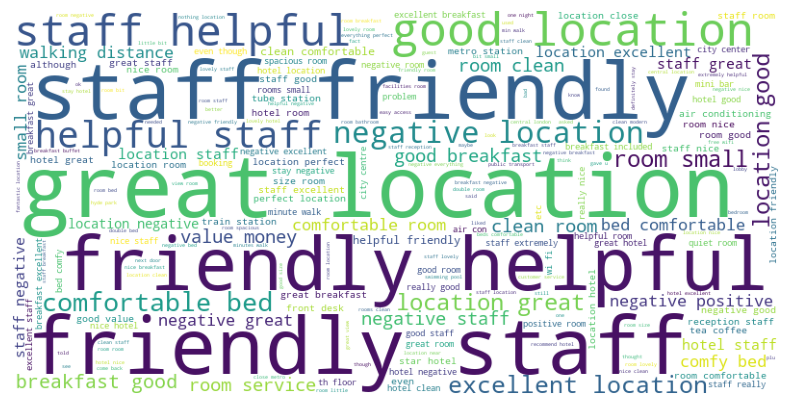

In [14]:
text = " ".join(df1['clean_review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

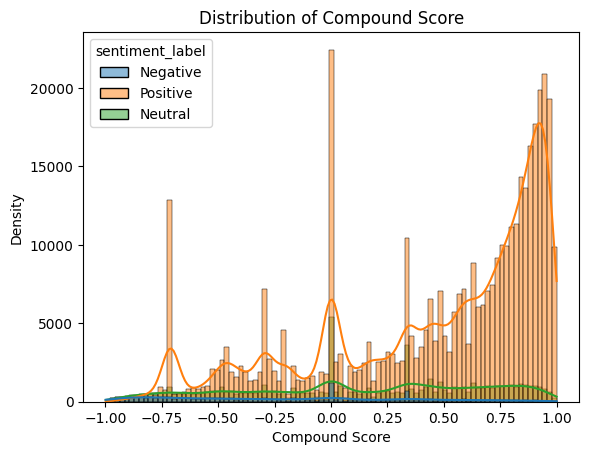

In [ ]:
import seaborn as sns

df_plot = df1[['Compound', 'sentiment']].dropna()
sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df_plot['sentiment_label'] = df_plot['sentiment'].map(sentiment_map)

sns.histplot(data=df_plot,x='Compound',hue='sentiment_label',kde=True)

plt.title('Distribution of Compound Score')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(df1['clean_review'])
X_vader = df1[['Compound']].values 

X = hstack([X_tfidf, X_vader])
y=df1['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # "Decision Tree": DecisionTreeClassifier(),
    # "Random Forest": RandomForestClassifier(),
    "SVC":LinearSVC(),
    # "KNN Classifier":KNeighborsClassifier(),
    # "Naive Bayes": MultinomialNB()
}

results = []

for name, model in models.items():
    print(f"starting model: {name}")
    start=time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),2),
        "Precision": round(precision_score(y_test, y_pred, average="weighted"),2), # type: ignore
        "Recall": round(recall_score(y_test, y_pred, average="weighted"),2), # type: ignore
        "F1 Score": round(f1_score(y_test, y_pred, average="weighted"),2), # type: ignore
        "Time taken": time.time()-start
    })
    print(f"{name} done in time: {time.time()-start}")
results


starting model: Logistic Regression
Logistic Regression done in time: 12.43866777420044
starting model: SVC
SVC done in time: 31.251444339752197


[{'Model': 'Logistic Regression',
  'Accuracy': 0.86,
  'Precision': 0.84,
  'Recall': 0.86,
  'F1 Score': 0.85,
  'Time taken': 12.43866777420044},
 {'Model': 'SVC',
  'Accuracy': 0.86,
  'Precision': 0.84,
  'Recall': 0.86,
  'F1 Score': 0.84,
  'Time taken': 31.251444339752197}]

In [26]:
lr=LogisticRegression(max_iter=2000,class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred),"\n")

print(classification_report(y_test, y_pred,target_names=["Negative", "Neutral", "Positive"]))

[[  3103   1433    240]
 [  5236  12676   3491]
 [  4986  21715 101842]] 

              precision    recall  f1-score   support

    Negative       0.23      0.65      0.34      4776
     Neutral       0.35      0.59      0.44     21403
    Positive       0.96      0.79      0.87    128543

    accuracy                           0.76    154722
   macro avg       0.52      0.68      0.55    154722
weighted avg       0.86      0.76      0.79    154722



In [27]:
lr=LogisticRegression(class_weight='balanced') #default max_iter
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred),"\n")

print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

[[  3100   1440    236]
 [  5172  12818   3413]
 [  4693  22352 101498]] 

              precision    recall  f1-score   support

    Negative       0.24      0.65      0.35      4776
     Neutral       0.35      0.60      0.44     21403
    Positive       0.97      0.79      0.87    128543

    accuracy                           0.76    154722
   macro avg       0.52      0.68      0.55    154722
weighted avg       0.86      0.76      0.79    154722



C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
svm=LinearSVC(class_weight='balanced',random_state=42)
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[  2177   2007    592]
 [  2869  11175   7359]
 [  2107  10509 115927]]
              precision    recall  f1-score   support

           0       0.30      0.46      0.36      4776
           1       0.47      0.52      0.50     21403
           2       0.94      0.90      0.92    128543

    accuracy                           0.84    154722
   macro avg       0.57      0.63      0.59    154722
weighted avg       0.85      0.84      0.84    154722



In [15]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(class_weight='balanced',random_state=42)

param_grid_lr = {
    "C": [0.01, 0.1],
    "solver": ["lbfgs",'saga']
}

grid_lr = GridSearchCV(
    log_reg,
    param_grid_lr,
    cv=3,                
    scoring="f1_macro",  
    verbose=2
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print(best_lr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=  13.8s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   8.6s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   8.7s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.01, solver=saga; total time=  57.3s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.01, solver=saga; total time=  54.4s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.01, solver=saga; total time=  54.7s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  17.2s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  17.2s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  15.7s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time=  55.3s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time=  56.3s


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time=  54.3s
LogisticRegression(C=0.1, class_weight='balanced', random_state=42)


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  3157   1380    239]
 [  5068  12851   3484]
 [  4468  22160 101915]]
              precision    recall  f1-score   support

           0       0.25      0.66      0.36      4776
           1       0.35      0.60      0.44     21403
           2       0.96      0.79      0.87    128543

    accuracy                           0.76    154722
   macro avg       0.52      0.68      0.56    154722
weighted avg       0.86      0.76      0.80    154722



In [17]:
from sklearn.model_selection import GridSearchCV

svc = LinearSVC(class_weight='balanced',random_state=42)

param_grid_svc= {
    "C": [0.01, 0.1],
    "max_iter":[1000,2000]
}

grid_svc = GridSearchCV(
    svc,
    param_grid_svc,
    cv=3,                
    scoring="f1_macro",  
    verbose=2
)

grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
print(best_svc)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..............................C=0.01, max_iter=1000; total time=  20.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=  16.3s
[CV] END ..............................C=0.01, max_iter=1000; total time=  12.0s
[CV] END ..............................C=0.01, max_iter=2000; total time=  13.4s
[CV] END ..............................C=0.01, max_iter=2000; total time=  11.9s
[CV] END ..............................C=0.01, max_iter=2000; total time=  12.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=  19.3s
[CV] END ...............................C=0.1, max_iter=1000; total time=  20.3s
[CV] END ...............................C=0.1, max_iter=1000; total time=  19.2s
[CV] END ...............................C=0.1, max_iter=2000; total time=  19.2s
[CV] END ...............................C=0.1, max_iter=2000; total time=  18.4s
[CV] END ...............................C=0.1, ma

In [ ]:
best_svc.fit(X_train,y_train)
y_pred_svc=best_svc.predict(X_test)

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

[[  2008   2075    693]
 [  2145  10842   8416]
 [  1363   9318 117862]]
              precision    recall  f1-score   support

           0       0.36      0.42      0.39      4776
           1       0.49      0.51      0.50     21403
           2       0.93      0.92      0.92    128543

    accuracy                           0.84    154722
   macro avg       0.59      0.61      0.60    154722
weighted avg       0.85      0.84      0.85    154722



In [20]:
from sklearn.preprocessing import label_binarize

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Probabilities
y_score_lr = best_lr.predict_proba(X_test)

from sklearn.metrics import roc_curve, auc

fpr_lr = {}
tpr_lr = {}
roc_auc_lr = {}

for i in range(3):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

In [21]:
y_score_svc = best_svc.decision_function(X_test)
fpr_svc = {}
tpr_svc = {}
roc_auc_svc = {}

for i in range(3):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_bin[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])


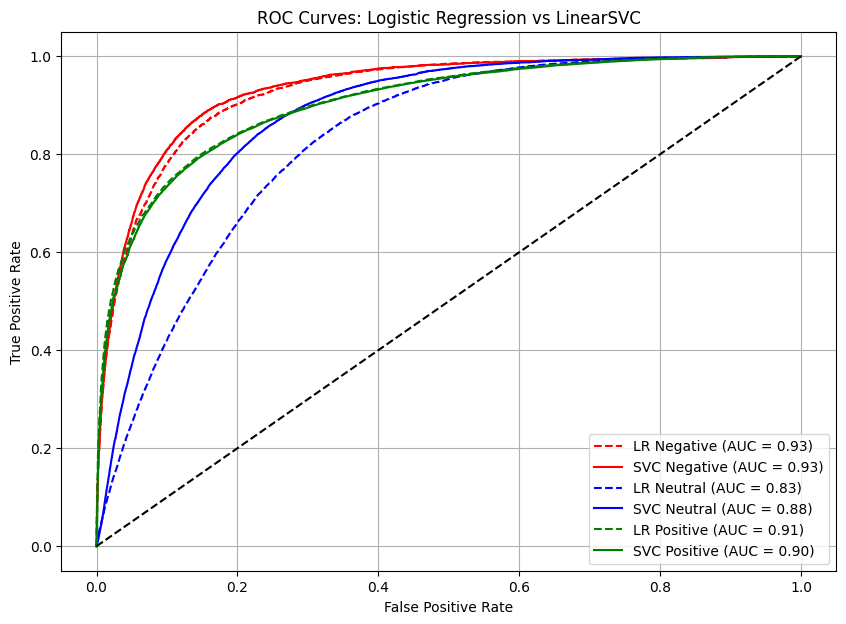

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

class_names = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'blue', 'green']

for i, color in zip(range(3), colors):
    plt.plot(
        fpr_lr[i],
        tpr_lr[i],
        color=color,
        linestyle='--',
        label=f'LR {class_names[i]} (AUC = {roc_auc_lr[i]:.2f})'
    )
    plt.plot(
        fpr_svc[i],
        tpr_svc[i],
        color=color,
        linestyle='-',
        label=f'SVC {class_names[i]} (AUC = {roc_auc_svc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Logistic Regression vs LinearSVC')
plt.legend()
plt.grid(True)
plt.show()


From the curve we can see:
 - ROC–AUC was computed using a One-vs-Rest strategy for all sentiment classes.

 - Both Logistic Regression and LinearSVC show strong class separability for Positive and Negative sentiments.

 - LinearSVC achieves higher ROC–AUC for the Neutral class, indicating better discrimination of ambiguous reviews.

 - High ROC–AUC for the Negative class does not translate to high precision due to class imbalance, highlighting the importance of Macro F1 over accuracy.

Overall, ROC–AUC results support the selection of LinearSVC, as it provides more balanced class separation.

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_lr_macro = roc_auc_score(
    y_test_bin,
    y_score_lr,
    average='macro',
    multi_class='ovr'
)

roc_auc_svc_macro = roc_auc_score(
    y_test_bin,
    y_score_svc,
    average='macro',
    multi_class='ovr'
)

print("Logistic Regression Macro ROC-AUC:", roc_auc_lr_macro)
print("LinearSVC Macro ROC-AUC:", roc_auc_svc_macro)


Logistic Regression Macro ROC-AUC: 0.8868052846773778
LinearSVC Macro ROC-AUC: 0.9041720817865895


In [66]:
def predict_sentiment(text):
    cleaned=clean_text(text)
    vector = tfidf.transform([cleaned])
    compound = sia.polarity_scores(text)['compound']
    compound_vec = np.array([[compound]])  
    X_input = hstack([vector, compound_vec])
    prediction = best_lr.predict(X_input)
    return prediction[0]

In [70]:
df1['predicted_sentiment'] = best_lr.predict(X)

C:\Users\aksha\AppData\Local\Temp\ipykernel_39064\3236830565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_sentiment'] = best_lr.predict(X)


In [72]:
df1['predicted_svc_sentiment'] = best_svc.predict(X)

C:\Users\aksha\AppData\Local\Temp\ipykernel_39064\2479511468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_svc_sentiment'] = best_svc.predict(X)


In [73]:
df1.head()

,review,sentiment,Negative,Neutral,Positive,Compound,clean_review,predicted_sentiment,predicted_svc_sentiment
0,Only the park outside of the hotel was beautif...,0,0.084,0.865,0.051,-0.9245,park outside hotel beautiful angry made post a...,0,1
1,No real complaints the hotel was great great l...,2,0.118,0.708,0.174,0.8340,real complaints hotel great great location sur...,2,2
2,Location was good and staff were ok It is cute...,2,0.122,0.740,0.138,-0.2263,location good staff ok cute hotel breakfast ra...,1,1
3,Great location in nice surroundings the bar an...,0,0.103,0.783,0.114,0.1910,great location nice surroundings bar restauran...,1,1
4,Amazing location and building Romantic setting...,1,0.058,0.861,0.081,0.5263,amazing location building romantic setting boo...,1,1


In [75]:
df1[['sentiment','predicted_sentiment','predicted_svc_sentiment']].value_counts()

sentiment  predicted_sentiment  predicted_svc_sentiment
2          2                    2                          340355
           1                    2                           47004
1          1                    1                           28648
2          1                    1                           26196
1          1                    2                           15543
           2                    2                           10979
           0                    1                            8374
0          0                    0                            7228
1          0                    0                            6687
2          0                    2                            5848
                                0                            4690
                                1                            4321
0          0                    1                            3593
           1                    1                            2868
1          0        

In [ ]:
df1.groupby(['sentiment', 'predicted_sentiment', 'predicted_svc_sentiment']).size()

sentiment  predicted_sentiment  predicted_svc_sentiment
0          0                    0                            7228
                                1                            3593
                                2                             623
           1                    0                               5
                                1                            2868
                                2                             872
           2                    2                             730
1          0                    0                            6687
                                1                            8374
                                2                            1066
           1                    0                              46
                                1                           28648
                                2                           15543
           2                    2                           10979
2          0        

From the above results we can see although Logistic Regression works well in analysing negative sentiments, it lacks in analysing positive and neutral outcomes which LinearSVC is able to do much better.

So, after the analysis we can conclude that LinearSVC is a better overall model for sentiment analysis done upon this dataset.